<a href="https://colab.research.google.com/github/Shivabairy005/Machine-Learning-Lab/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
itssuru_loan_data_path = kagglehub.dataset_download('itssuru/loan-data')
akshaydattatraykhare_diabetes_dataset_path = kagglehub.dataset_download('akshaydattatraykhare/diabetes-dataset')

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print("Shape:", X.shape)
print("Target classes:", cancer.target_names)
print("Feature names:", cancer.feature_names[:5])  # first 5 features


Shape: (569, 30)
Target classes: ['malignant' 'benign']
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print("Shape:", X.shape)
print("Target classes:", iris.target_names)
print("Feature names:", iris.feature_names)


Shape: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
file_path = "/kaggle/input/diabetes-dataset/diabetes.csv"
df = pd.read_csv(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'Age','SkinThickness','Insulin','DiabetesPedigreeFunction'] :
    print(i in df.columns)

True
True
True
True
True
True
True


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train , X_test , y_train , y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'Age','SkinThickness','Insulin','DiabetesPedigreeFunction','BMI']

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


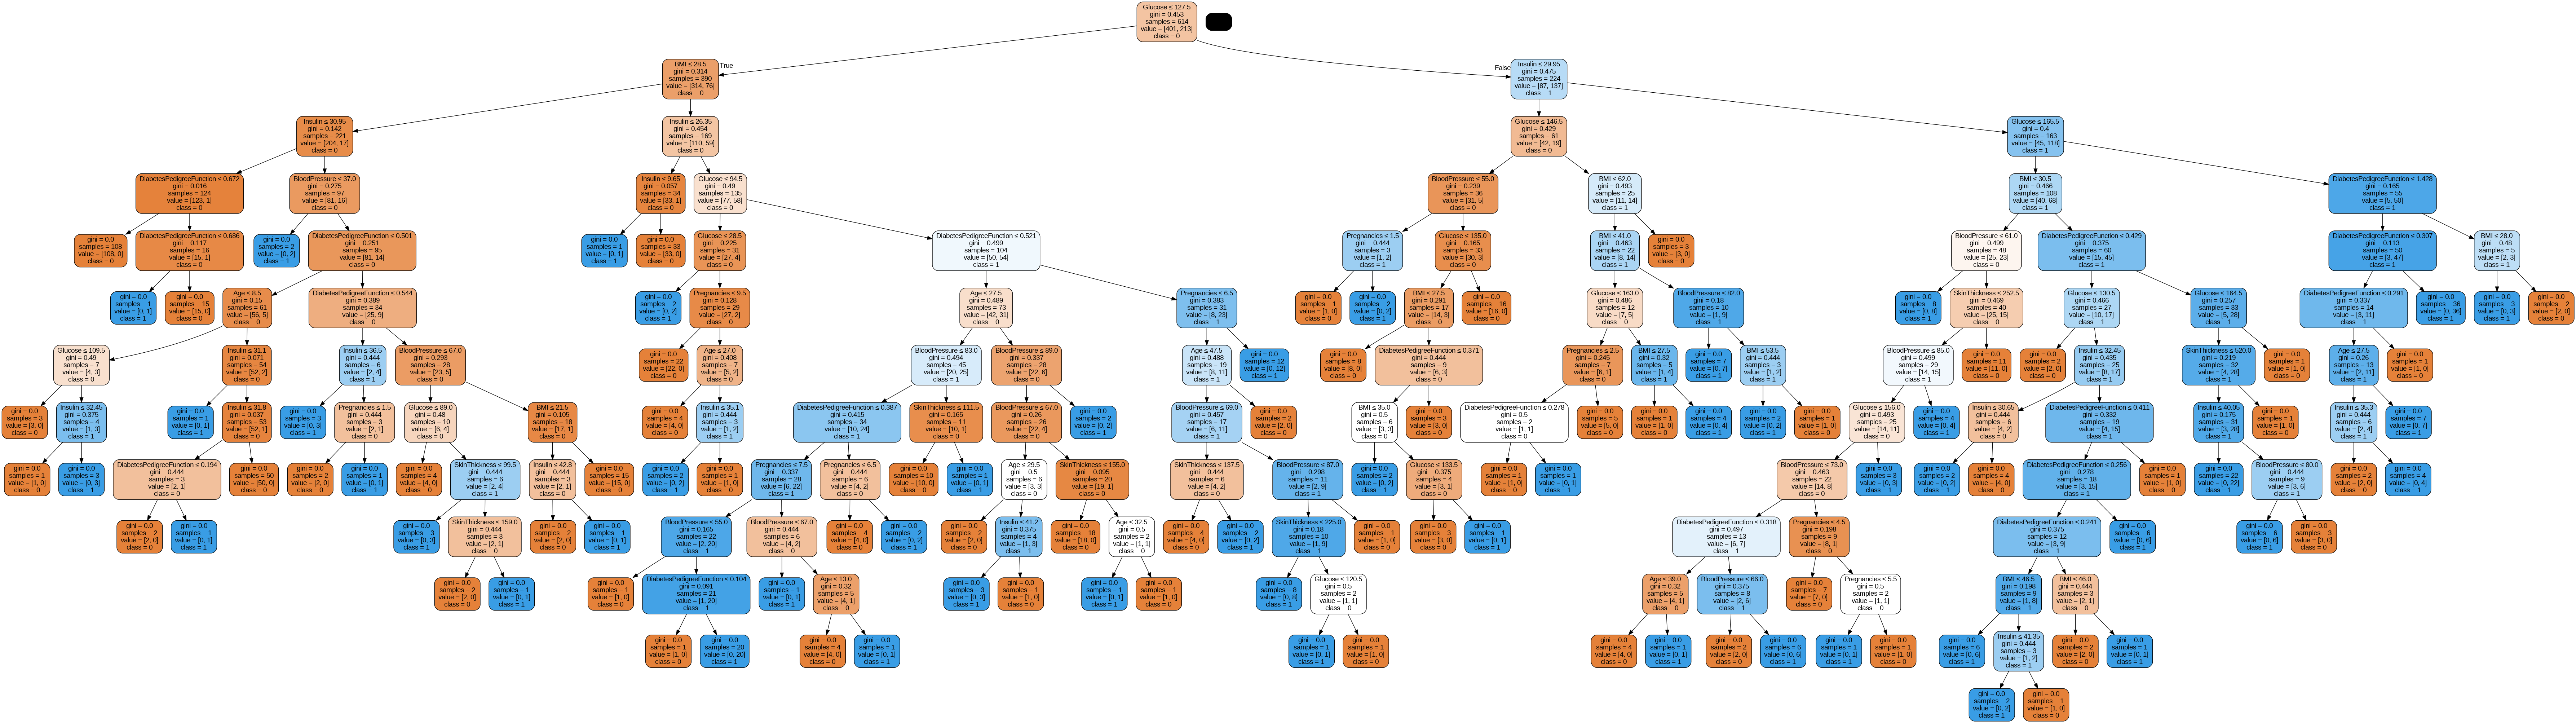

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
file_path2 = "/kaggle/input/loan-data/loan_data.csv"
df2 = pd.read_csv(file_path2)

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [ ]:
le = LabelEncoder()
for i in ['int.rate','purpose','installment','log.annual.inc','dti','days.with.cr.line','revol.util'] :
    df2[i] = le.fit_transform(df2[i])

In [ ]:
x_train2 , x_test2 ,y_train2 , y_test2 = train_test_split(
    df2.drop('not.fully.paid',axis=1),
    df2['not.fully.paid'],
    test_size = 0.3,
    random_state = 42

)

In [ ]:
model = GaussianNB()
model.fit(x_train2,y_train2)

y_pred = model.predict(x_test2)

In [ ]:
accuracy = metrics.accuracy_score(y_test2,y_pred)
print(f'accuracy:{accuracy*100:.2f}')

accuracy:81.63


In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)